# preparation

---



---



In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/yolov7

/content/gdrive/MyDrive/yolov7


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="UwXTaF4TJcxmWIpBAq8c")
project = rf.workspace("amin-mavaddat").project("apple-data-set-last")
dataset = project.version(1).download("yolov7")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Apple-data-set-Last--1 in yolov7pytorch:: 100%|██████████| 232/232 [00:01<00:00, 181.24it/s]


## Detection

---



---



In [ ]:
!python detect.py --source /content/dt1cam2_2021-07-04_02-15-08.jpg --weights /content/gdrive/MyDrive/DRCAP/Detection/best80.pt  --conf-thres 0.25

Namespace(weights=['/content/gdrive/MyDrive/DRCAP/Detection/best80.pt'], source='/content/dt1cam2_2021-07-04_02-15-08.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 2.0.1+cu118 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36479926 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
23 Apples, Done. 

In [ ]:
import torch
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import os
import torch
import matplotlib.pyplot as plt

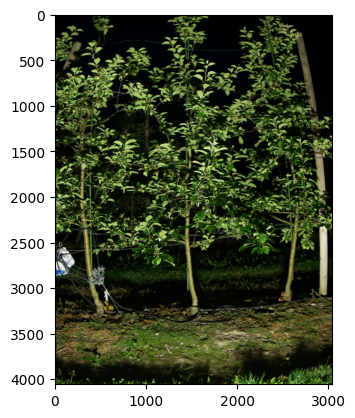

In [ ]:
image = cv2.imread('/content/dt1cam2_2021-07-04_02-15-08.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [17]:
!python detect_and_crop.py --weights /content/drive/MyDrive/DRCAP/Detection/best80.pt --source /content/dt1cam2_2022-09-09_02-15-08.jpg

Namespace(weights=['/content/drive/MyDrive/DRCAP/Detection/best80.pt'], source='/content/dt1cam2_2022-09-09_02-15-08.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 2.0.1+cu118 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36479926 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
101 Apples, Done. 

In [13]:
%cd /content/drive/MyDrive/yolov7

/content/drive/MyDrive/yolov7


### Analyse

---



---



In [23]:
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import  Dropout
from keras.layers import Layer
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from keras.applications.vgg16 import VGG16
import os
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,BatchNormalization
import copy
import sys
from tensorflow.keras.models import Model
from skimage.transform import resize
from sklearn.svm import SVC
from joblib import dump, load
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
tf.__version__

'2.13.0'

(124, 124, 3)
(1, 124, 124, 3)
1/1 [==============================] - 1s 1s/step
[1]


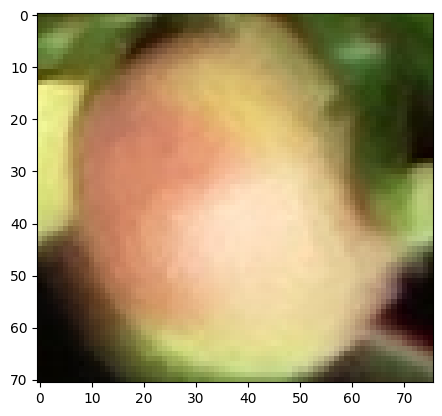

In [24]:
model2=keras.models.load_model('/content/drive/MyDrive/DRCAP/Analyse/Classification/My Model/Apple_Amin1(0.9833).h5')
img3_1 = cv2.imread('/content/drive/MyDrive/yolov7/crop/11.jpg')
img3_1=cv2.cvtColor(img3_1, cv2.COLOR_BGR2RGB)
plt.imshow(img3_1)

img3=copy.copy(img3_1)

img3=cv2.resize(img3,(124,124))
print(img3.shape)

img = img3.reshape(1, 124,124, 3)
print(img.shape)
img = img.astype('float32')
img = img / 255.0


y_pred1 = model2.predict(img)
y_pred1 = np.argmax(y_pred1, axis=1)
print(y_pred1)


In [25]:
MLmodel_R=load('/content/drive/MyDrive/DRCAP/Analyse/Regression/Amin_transfer_TheilSenRegressor898.joblib')
DNNmodel1=keras.models.load_model('/content/drive/MyDrive/DRCAP/Analyse/Regression/VGG_Apple_Model_TheilSenRegressor898.h5')

img_test = cv2.resize(img3_1, (124, 124))
img_test = img_test / 255.0
img_test = np.expand_dims(img_test, axis=0)
feature_testt = DNNmodel1.predict(img_test)
feature_testt = feature_testt.reshape(feature_testt.shape[0], -1)
print(feature_testt.shape)
y_predict_test_R = MLmodel_R.predict(feature_testt)
print('end')
if y_predict_test_R <0:
  print(f'"Regression"{0}"')
else:
  print(f'"Regression"{y_predict_test_R}')



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator TheilSenRegressor from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


1/1 [==============================] - 0s 311ms/step
(1, 25088)
end
"Regression"[1.19711092]


1 124
71 76
71 76
"Class"1"


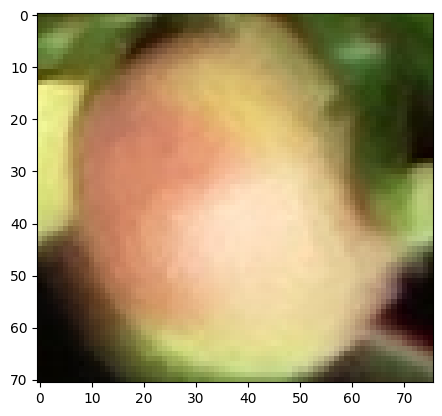

In [26]:
height, width = img.shape[:2]
print(height,width)
#########################################################################
x=0
y1=0

for i in range(len(img3_1)):
    x+=1
    for j in range(len(img3_1[i])):
        y1+=1

print(i+1,j+1)

y=y1/x
y=int(y)
print(x,y)

if x<= 45 & y<= 45 :
    print(f'"Class"{0}"')
if x>=78 & y>=73:
       print(f'"Class"{2}"')
else:
         print(f'"Class"{1}"')
plt.imshow(img3_1)